In [977]:
import math
import sympy

In [978]:
#k_0の設定
def set_k_0(lamb):
    return  (2*pi) / lamb

#近似解
def set_n_0(n_c , n_f , n_s , k_0 , T, m):
    gamma_c = k_0 * (math.pow(n_f,2) - math.pow(n_c,2)) ** 0.5
    gamma_s = k_0 * (math.pow(n_f,2) - math.pow(n_s,2)) ** 0.5
    T_eff = T + 1/gamma_c + 1/ gamma_s
    return  n_f - ((m+1)*pi / T_eff)/(2*k_0*n_f)

#超越方程式
def f(N,k_x,m):
    return (k_x*T - (m+1)*pi + sympy.atan(k_x / gamma_c) + sympy.atan(k_x / gamma_s) ) 

#微分
def df(N):
    return -N*T*k_0*(-N**2 + n_f**2)**(-0.5) - N*(-N**2 + n_f**2)**(-0.5)*(-n_c**2 + n_f**2)**0.5/((-N**2 + n_f**2)*(-n_c**2 + n_f**2) + 1) - N*(-N**2 + n_f**2)**(-0.5)*(n_f**2 - n_s**2)**0.5/((-N**2 + n_f**2)*(n_f**2 - n_s**2) + 1)

#k_x
def set_k_x(k_0,n_f,N):
    return (k_0* (n_f**2 - N**2)**0.5)

#gamma_c
def set_gamma_c(k_0,n_f,n_c):
    return k_0 * ((n_f**2 - n_c**2)) ** 0.5

#gamma_s
def set_gamma_s(k_0,n_f,n_s):
    return k_0 * ((n_f**2 -n_s**2)) ** 0.5

#ニュートン法
def newton_method(m,eps=1e-5):
    #初期値
    N_0 = set_n_0(n_c , n_f , n_s , k_0 , T, m) 
    while True: 
        #Nでk_xを更新
        k_x = set_k_x(k_0,n_f,N_0) 
        N_1 = N_0 - (f(N_0,k_x,m) / df(N_0))
        print("N_0:",N_0,"N_1:",N_1)
        if(abs(N_1 - N_0) < eps):
            return N_1
        N_0 = N_1

In [979]:
#問題で与えられた値設定
micro = 1e-6
n_c = 3.3
n_f = 3.5
n_s = 3.4
T = 1 #* micro
lamd = 0.86 #*micro

#初期値設定
#k_0
k_0 = set_k_0(lamd) 
#gamma_c
gamma_c = set_gamma_c(k_0,n_f,n_s)
#gamma_s
gamma_s = set_gamma_s(k_0,n_f,n_s)
#k_x
k_x = set_k_x(k_0,n_f,n_0) 

In [980]:
#ニュートン法でNを求める
result_n_0 = newton_method(0)
result_n_0

N_0: 3.4520891745416007 N_1: 3.49566182252819
N_0: 3.49566182252819 N_1: 3.48781201948543
N_0: 3.48781201948543 N_1: 3.48475545463671
N_0: 3.48475545463671 N_1: 3.48466362347671
N_0: 3.48466362347671 N_1: 3.48466644140919


3.48466644140919

In [981]:
#ニュートン法でNを求める
result_n_1 = newton_method(1)
result_n_1

N_0: 3.4041783490832014 N_1: 3.43820426980588
N_0: 3.43820426980588 N_1: 3.43460401202425
N_0: 3.43460401202425 N_1: 3.43458842995870
N_0: 3.43458842995870 N_1: 3.43458860674657


3.43458860674657

In [982]:
#E_c
E_c = 1
n_0 = result_n_0
n_1 = result_n_1


In [983]:
import matplotlib.pyplot as plt


In [984]:
#E(x)のグラフ
def E(x,N):
    gamma_c = k_0 * ((N**2 - n_c**2))**0.5
    gamma_s = k_0 * ((N**2 - n_s **2)) ** 0.5
    k_x = k_0 * ((n_f**2 -N**2))**0.5

    if (0 < x) : 
        return E_c * exp( - gamma_c * x)
    elif (-T < x< 0) : 
        return E_c * (math.cos(k_x * x) - (gamma_c / k_x) *math.sin(k_x * x))
    elif (x < - T) : 
        return E_c * (math.cos(k_x * T) +  (gamma_c / k_x) *math.sin(k_x * T)) * math.exp(gamma_s * (x + T))


In [985]:
#グラフ用xに0.001刻みで値を生成する
def frange(start, final, increment=0.001):
    numbers = []

    while start < final:
        numbers.append(start)
        start = start + increment
    return numbers

xs = frange(-2,2)

In [986]:
#y
y = []
for i in range(len(xs)):
    #print(E(xs[i],n_0))
    y.append(E(xs[i],n_0))

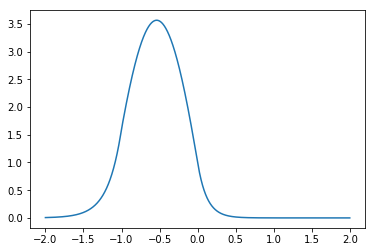

In [987]:
#モード0
plt.plot(xs,y)

In [988]:
#y
y2 = []
for i in range(len(xs)):
    print(E(xs[i],n_1))
    y2.append(E(xs[i],n_1))

-0.0337138678412473
-0.0338338410601915
-0.0339542412124479
-0.0340750698172893
-0.0341963283993950
-0.0343180184888700
-0.0344401416212641
-0.0345626993375918
-0.0346856931843512
-0.0348091247135436
-0.0349329954826935
-0.0350573070548678
-0.0351820609986957
-0.0353072588883885
-0.0354329023037593
-0.0355589928302434
-0.0356855320589177
-0.0358125215865211
-0.0359399630154748
-0.0360678579539021
-0.0361962080156490
-0.0363250148203046
-0.0364542799932212
-0.0365840051655353
-0.0367141919741877
-0.0368448420619444
-0.0369759570774175
-0.0371075386750855
-0.0372395885153148
-0.0373721082643800
-0.0375050995944855
-0.0376385641837863
-0.0377725037164092
-0.0379069198824741
-0.0380418143781153
-0.0381771889055030
-0.0383130451728646
-0.0384493848945064
-0.0385862097908351
-0.0387235215883797
-0.0388613220198131
-0.0389996128239741
-0.0391383957458893
-0.0392776725367949
-0.0394174449541593
-0.0395577147617048
-0.0396984837294301
-0.0398397536336325
-0.0399815262569303
-0.0401238033882856


-0.161491698574573
-0.162066378377021
-0.162643103218801
-0.163221880377331
-0.163802717155929
-0.164385620883901
-0.164970598916634
-0.165557658635690
-0.166146807448900
-0.166738052790455
-0.167331402121002
-0.167926862927737
-0.168524442724499
-0.169124149051867
-0.169725989477252
-0.170329971594995
-0.170936103026463
-0.171544391420142
-0.172154844451738
-0.172767469824269
-0.173382275268167
-0.173999268541373
-0.174618457429433
-0.175239849745602
-0.175863453330936
-0.176489276054395
-0.177117325812942
-0.177747610531641
-0.178380138163758
-0.179014916690861
-0.179651954122922
-0.180291258498416
-0.180932837884424
-0.181576700376735
-0.182222854099946
-0.182871307207567
-0.183522067882122
-0.184175144335253
-0.184830544807826
-0.185488277570030
-0.186148350921485
-0.186810773191347
-0.187475552738409
-0.188142697951212
-0.188812217248148
-0.189484119077565
-0.190158411917876
-0.190835104277665
-0.191514204695794
-0.192195721741512
-0.192879664014561
-0.193566040145288
-0.194254858

-1.27839104097342
-1.28412222065762
-1.28982230878845
-1.29549116735366
-1.30112865909714
-1.30673464752225
-1.31230899689510
-1.31785157224788
-1.32336223938209
-1.32884086487179
-1.33428731606685
-1.33970146109617
-1.34508316887083
-1.35043230908731
-1.35574875223062
-1.36103236957743
-1.36628303319922
-1.37150061596533
-1.37668499154609
-1.38183603441583
-1.38695361985596
-1.39203762395795
-1.39708792362638
-1.40210439658186
-1.40708692136404
-1.41203537733455
-1.41694964467986
-1.42182960441427
-1.42667513838271
-1.43148612926368
-1.43626246057200
-1.44100401666171
-1.44571068272882
-1.45038234481412
-1.45501888980593
-1.45962020544282
-1.46418618031636
-1.46871670387378
-1.47321166642069
-1.47767095912370
-1.48209447401309
-1.48648210398536
-1.49083374280592
-1.49514928511157
-1.49942862641310
-1.50367166309781
-1.50787829243203
-1.51204841256358
-1.51618192252425
-1.52027872223227
-1.52433871249468
-1.52836179500978
-1.53234787236949
-1.53629684806169
-1.54020862647261
-1.5440831

1.58536793033791
1.58192252077179
1.57843880922188
1.57491688003684
1.57135681849069
1.56775871078071
1.56412264402536
1.56044870626218
1.55673698644567
1.55298757444509
1.54920056104234
1.54537603792973
1.54151409770776
1.53761483388288
1.53367834086525
1.52970471396642
1.52569404939703
1.52164644426451
1.51756199657069
1.51344080520944
1.50928296996429
1.50508859150599
1.50085777139010
1.49659061205451
1.49228721681696
1.48794768987255
1.48357213629121
1.47916066201516
1.47471337385635
1.47023037949385
1.46571178747127
1.46115770719411
1.45656824892715
1.45194352379172
1.44728364376306
1.44258872166758
1.43785887118016
1.43309420682134
1.42829484395463
1.42346089878364
1.41859248834929
1.41368973052702
1.40875274402386
1.40378164837561
1.39877656394395
1.39373761191348
1.38866491428881
1.38355859389164
1.37841877435773
1.37324558013393
1.36803913647517
1.36279956944144
1.35752700589472
1.35222157349588
1.34688340070166
1.34151261676151
1.33610935171445
1.33067373638598
1.325205902384

0.00538717681305137
0.005349835224034724
0.005312752470827385
0.005275926759291023
0.005239356307723501
0.005203039346772675
0.005166974119350786
0.005131158880549452
0.005095591897555244
0.005060271449565848
0.005025195827706812
0.004990363334948865
0.004955772286025811
0.004921421007352995
0.004887307836946329
0.0048534311243418815
0.004819789230516028
0.004786380527806149
0.00475320339983188
0.004720256241416912
0.004687537458511328
0.004655045468114466
0.004622778698198356
0.004590735587631644
0.004558914586104068
0.004527314154051445
0.004495932762581193
0.004464768893398349
0.004433821038732121
0.004403087701262933
0.004372567394049983
0.004342258640459302
0.004312159974092313
0.004282269938714881
0.004252587088186859
0.004223109986392121
0.004193837207169078
0.00416476733424168
0.004135898961150893
0.004107230691186653
0.004078761137320279
0.004050488922137385
0.004022412677771227
0.003994531045836521
0.003966842677363727
0.003939346232733778
0.003912040381613273
0.0038849238028

0.00016632183414786404
0.0001651689628405409
0.00016402408274049404
0.00016288713845611703
0.00016175807497975417
0.00016063683768503917
0.00015952337232425217
0.0001584176250256951
0.0001573195422910853
0.0001562290709929672
0.00015514615837214184
0.0001540707520351143
0.00015300279995155854
0.00015194225045180108
0.00015088905222431965
0.00014984315431326156
0.00014880450611597811
0.00014777305738057641
0.00014674875820348804
0.00014573155902705462
0.00014472141063713007
0.00014371826416069962
0.00014272207106351517
0.00014173278314774708
0.0001407503525496524
0.00013977473173725893
0.00013880587350806564
0.00013784373098675896
0.00013688825762294478
0.00013593940718889622
0.00013499713377731714
0.00013406139179912097
0.0001331321359812251
0.00013220932136436038
0.00013129290330089594
0.0001303828374526791
0.00012947907978889012
0.00012858158658391171
0.0001276903144152144
0.00012680522016125434
0.00012592626099938785
0.00012505339440379933
0.0001241865781434439
0.0001233257702800040

5.170804586660172e-06
5.134962796709517e-06
5.099369446607117e-06
5.064022814274965e-06
5.028921189571757e-06
4.994062874210153e-06
4.959446181674607e-06
4.925069437139774e-06
4.890930977389475e-06
4.857029150736232e-06
4.8233623169413504e-06
4.789928847135566e-06
4.756727123740231e-06
4.7237555403890605e-06
4.691012501850405e-06
4.658496423950076e-06
4.626205733494697e-06
4.59413886819559e-06
4.56229427659319e-06
4.530670417981982e-06
4.499265762335955e-06
4.468078790234582e-06
4.437107992789296e-06
4.406351871570519e-06
4.375808938535118e-06
4.345477715954441e-06
4.315356736342815e-06
4.285444542386546e-06
4.25573968687341e-06
4.2262407326226355e-06
4.196946252415367e-06
4.167854828925619e-06
4.138965054651697e-06
4.1102755318481e-06
4.081784872457901e-06
4.053491698045581e-06
4.025394639730346e-06
3.997492338119892e-06
3.969783443244638e-06
3.9422666144924105e-06
3.91494052054358e-06
3.887803839306653e-06
3.860855257854307e-06
3.8340934723598606e-06
3.807517188034202e-06
3.781125119

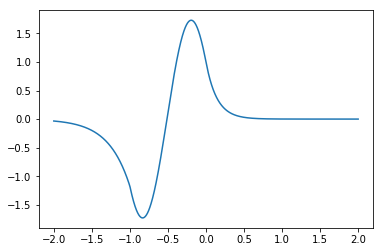

In [989]:
#モード1
plt.plot(xs,y2)